In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree #For plotting a tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 6)

In [4]:
df['Fraud'] = np.where(df['Taxable.Income']<= 30000, 'Risky', 'Good')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [5]:
data = df.rename({'Marital.Status': 'Marital_Status', 'Taxable.Income': 'Taxable_Income', 'City.Population': 'City_Population', 'Work.Experience': 'Work_Experience'}, axis=1)
data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Fraud
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [6]:
#label_encoder = preprocessing.LabelEncoder()
#fraud['Fraud']= label_encoder.fit_transform(fraud['Fraud']) 
#fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 
#fraud['Urban']= label_encoder.fit_transform(fraud['Urban'])
#fraud['Marital_Status']= label_encoder.fit_transform(fraud['Marital_Status']) 
#fraud

In [7]:
fraud = pd.get_dummies(data.iloc[:,0:6])
fraud

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [8]:
fraud['Fraud'] = data['Fraud'].map({'Risky':1 ,'Good':0})
fraud

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,Fraud
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,0
596,69967,55369,2,0,1,1,0,0,0,1,0
597,47334,154058,0,1,0,1,0,0,0,1,0
598,98592,180083,17,0,1,0,1,0,1,0,0


In [9]:
#Correlation
fraud.corr()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES,Fraud
Taxable_Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628,-0.688725
City_Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098,0.012225
Work_Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559,-0.001972
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267,-0.012523
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267,0.012523
Marital_Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518,-0.027115
Marital_Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771,0.043178
Marital_Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014,-0.015820
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000,-0.004830
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000,0.004830


In [10]:
fraud.Fraud.value_counts()

0    476
1    124
Name: Fraud, dtype: int64

In [39]:
X = fraud.iloc[:,1:-1]
y = fraud['Fraud']

In [40]:
X

,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Fraud, Length: 600, dtype: int64

In [71]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=6)

In [72]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

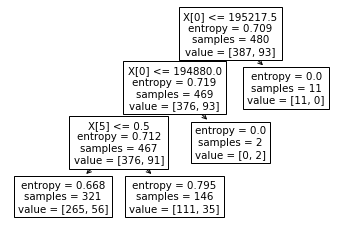

In [73]:
#PLot the decision tree
tree.plot_tree(model);

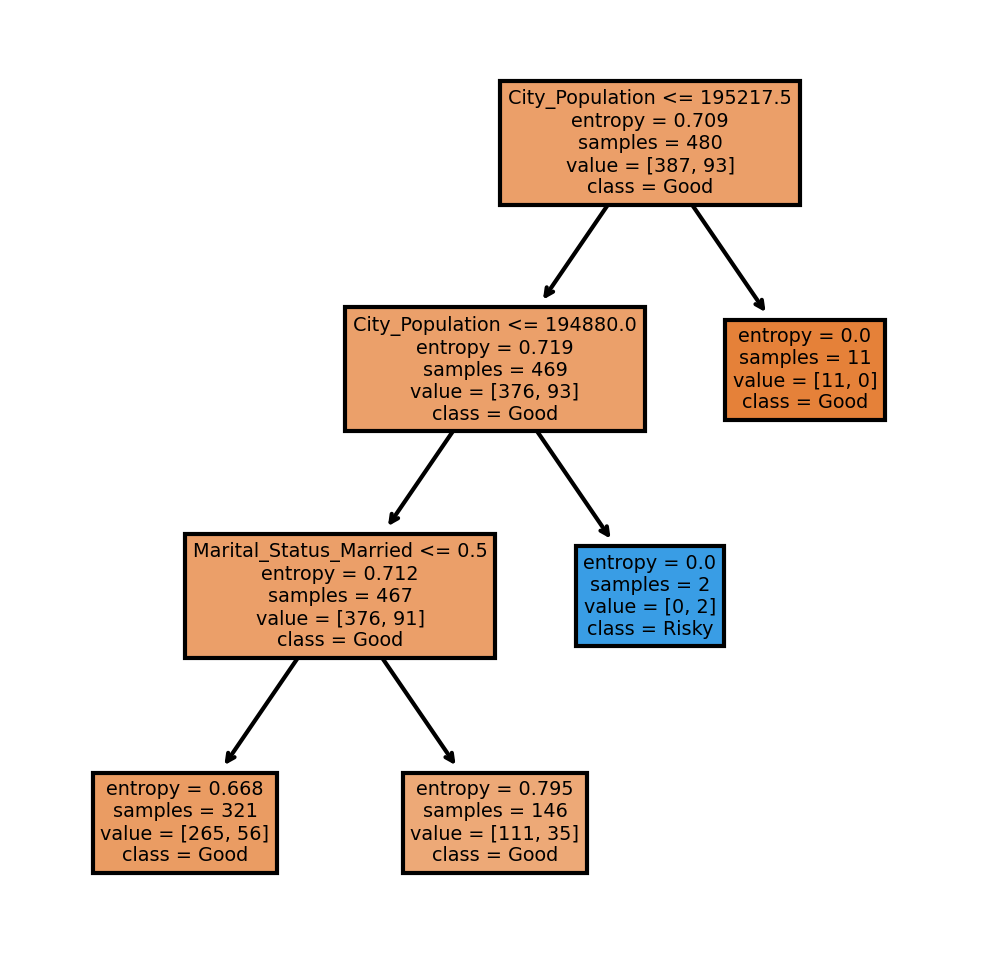

In [74]:
fn=['City_Population','Work_Experience','Undergrad_NO','Undergrad_YES','Marital_Status_Divorced','Marital_Status_Married','Marital_Status_Single','Urban_NO','Urban_YES']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [75]:
#Predicting on test data
preds = model.predict(X_test) 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [76]:
pd.crosstab(y_test,preds)

col_0,0
Fraud,
0,89
1,31


In [77]:
# Accuracy 
np.mean(preds==y_test)

0.7416666666666667

In [78]:
actual_vs_predict = pd.DataFrame({'Actual': y_test,'Prediction': preds})
actual_vs_predict

,Actual,Prediction
121,1,0
290,0,0
310,0,0
282,0,0
134,0,0
...,...,...
248,1,0
33,0,0
207,1,0
503,0,0


In [79]:
print(model.feature_importances_)

[0.81000707 0.         0.         0.         0.         0.18999293
 0.         0.         0.        ]


Feature: 0, Score: 0.80032
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.19968
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


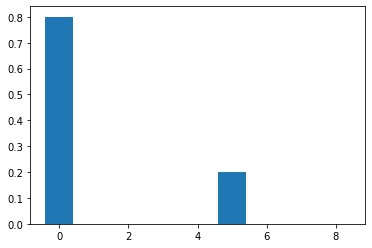

In [70]:
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
#plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()